Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in
predicting the quality of wine.

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mp

data_wine = pd.read_csv("winequality-red.csv")

In [2]:
data_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              3.031416         -0.079851     0.227820   
volatile acidity          -0.079851          0.032062    -0.019272   
citric acid                0.227820         -0.019272     0.037947   
residual sugar             0.281756          0.000484     0.039434   
chlorides                  0.007679          0.000517     0.001869   
free sulfur dioxide       -2.800921         -0.019674    -0.124252   
total sulfur dioxide      -6.482346          0.450426     0.227697   
density                    0.002195          0.000007     0.000134   
pH                        -0.183586          0.006495    -0.016298   
sulphates                  0.054010         -0.007921     0.010328   
alcohol                   -0.114421         -0.038600     0.022815   
quality                    0.174424         -0.056476     0.035612   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

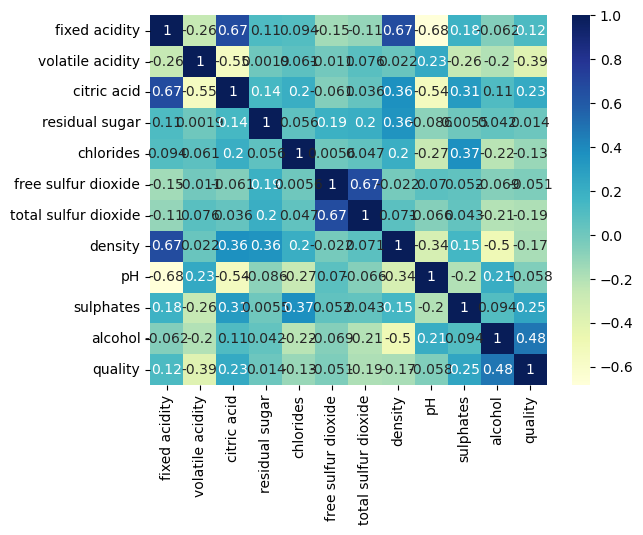

In [3]:
print(data_wine.cov())
# plotting correlation heatmap
dataplot = sb.heatmap(data_wine.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

In [4]:
####As per correlation of feature with quality- Fixed acidity, Citric acid, sulphates, Alcohol 
###and volatile acidity are key features
## Fixed acidity, Citric acid, sulphates, Alcohol  are positivelu correlated whereas volatile acidity s highly negatively correlated


*********
Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques.

In [5]:
data_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no missing data in wine quality dataest.
Imputation techniques are used to fill in missing data in datasets when some values are absent. Different imputation methods have their own advantages and disadvantages, and the choice of technique depends on the nature of the data, the extent of missingness, and the analysis goals. Here, I'll discuss some common imputation techniques and their pros and cons:

1. Mean/Mode Imputation:

Advantage: Simple and quick to implement. Preserves the mean/mode of the variable, which can help maintain overall data distribution.
Disadvantage: May underestimate the variance and correlations in the data, leading to biased results. Ignores any relationship between the variable with missing values and other variables.


2. Median/Most Frequent Imputation:

Advantage: Robust to outliers compared to mean/mode imputation. Can be suitable for variables with skewed distributions.
Disadvantage: Still ignores any relationships with other variables. May not be appropriate for variables with more complex distributions.


3. K-Nearest Neighbors (KNN) Imputation:

Advantage: Considers the similarity between data points, making it useful for capturing complex relationships. Can handle non-linear associations.
Disadvantage: Computationally intensive and may require feature scaling. The choice of k (number of neighbors) can impact imputation quality. May not perform well with high-dimensional data.


4. Interpolation and Extrapolation:

Advantage: Effective for time-series data or data with a clear ordering. Captures trends and patterns in the data.
Disadvantage: May not be suitable for non-linear relationships or data with complex patterns. Extrapolation can be highly uncertain.

**************
Q3. What are the key factors that affect students' performance in exams? How would you go about
analyzing these factors using statistical techniques?

In [7]:
data_stud = pd.read_csv("stud.csv")
data_stud.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df=data_stud
[feature for feature in df.columns if df[feature].dtype=='O']

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

Above are the categorical vaiables. 


In [9]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']

In [10]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [11]:
## Aggregate the total score with mean

df['total_score']=(df['math_score']+df['reading_score']+df['writing_score'])
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


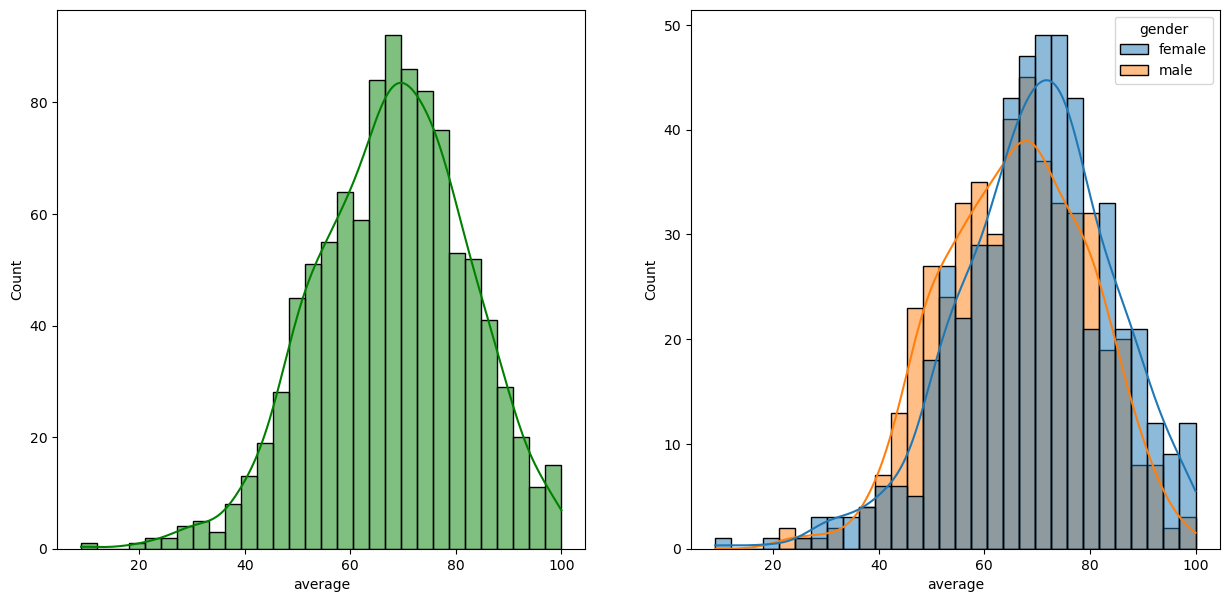

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

## Explore More Visualization
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')
plt.show()

## Insights
- Female student tend to perform well than male students

/tmp/ipykernel_236/3741398208.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
/tmp/ipykernel_236/3741398208.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
/tmp/ipykernel_236/3741398208.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


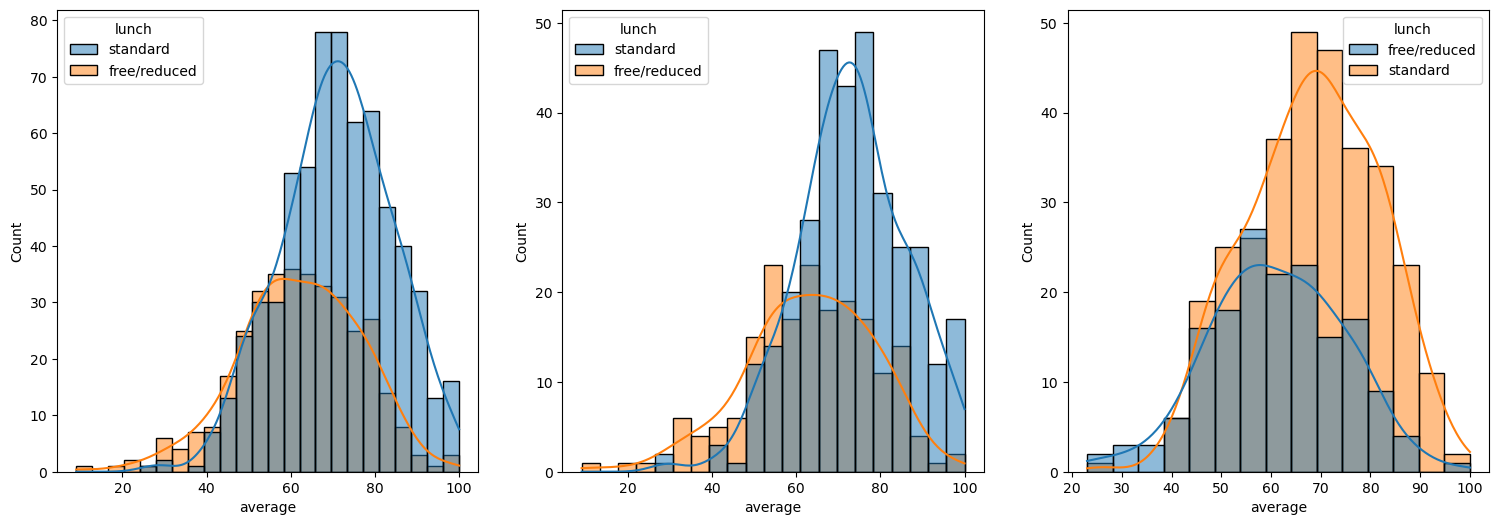

In [13]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()



## Insights
- Standard Lunch help students perform well in exams
- Standard lunch helps perform well in exams be it a male of female

**************

Q4. Describe the process of feature engineering in the context of the student performance data set. How
did you select and transform the variables for your model?

Based on EDA; Lunch, Gender, Parental Education are key factors affecting student's score.

As there are caterogrical variables, they will need to be encoded. Below encoding techniques can be used.

Gender - Binary encoding 0 for Male, 1 or female
Lunch - Label encoding as this is nomial data
Parental Education - Ordinal Encoding as there s a fxed order for education 

******
Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?

In [14]:
data_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
ls=list(data_wine.columns)

ls1=ls[:6]
ls2=ls[6:]


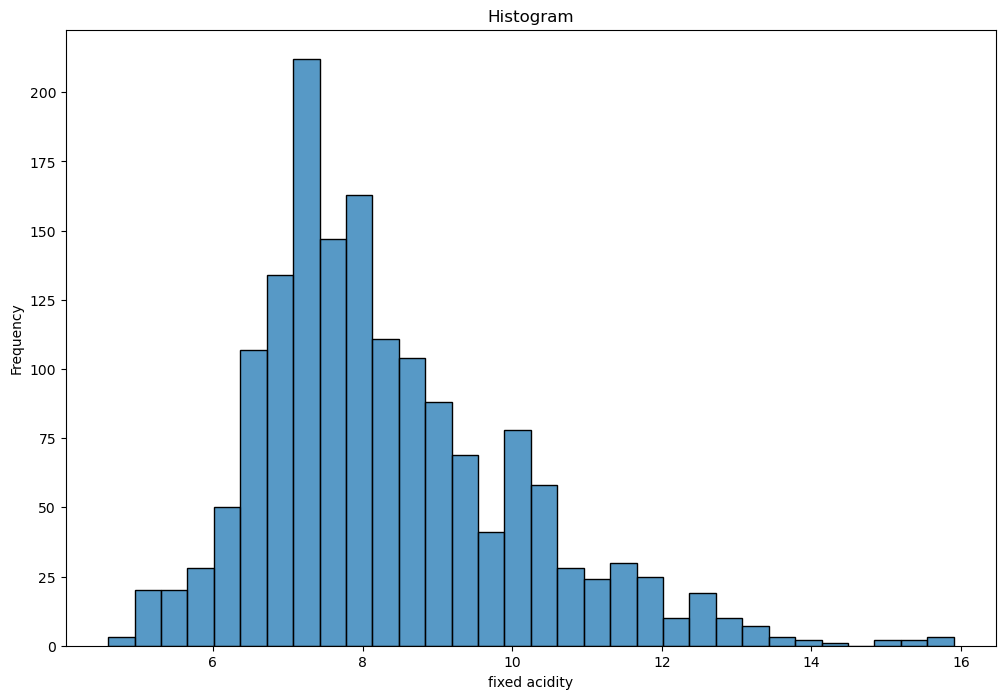

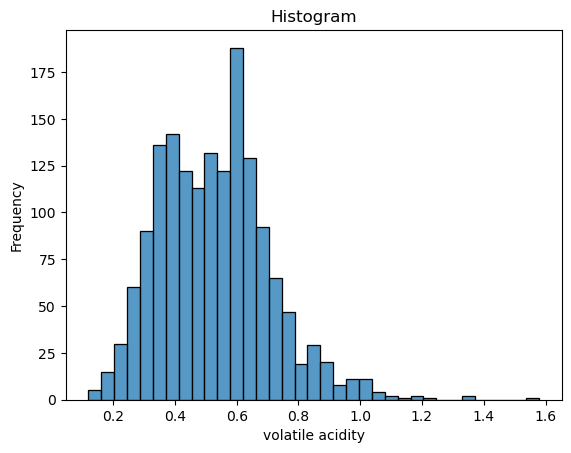

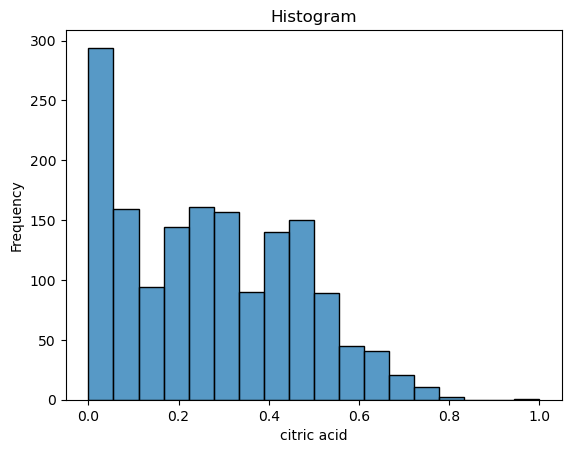

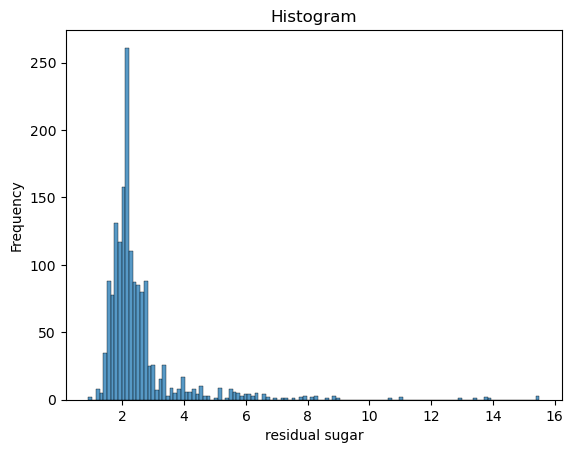

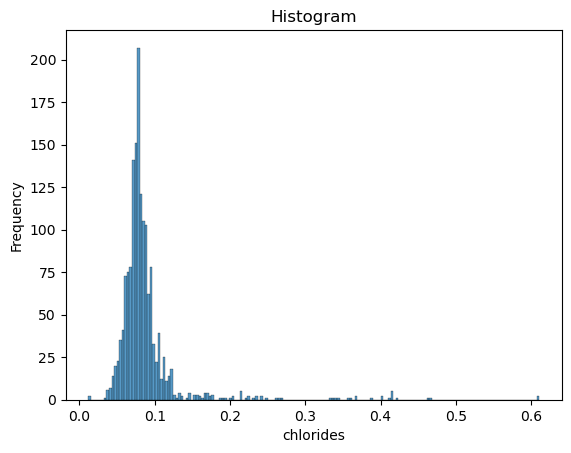

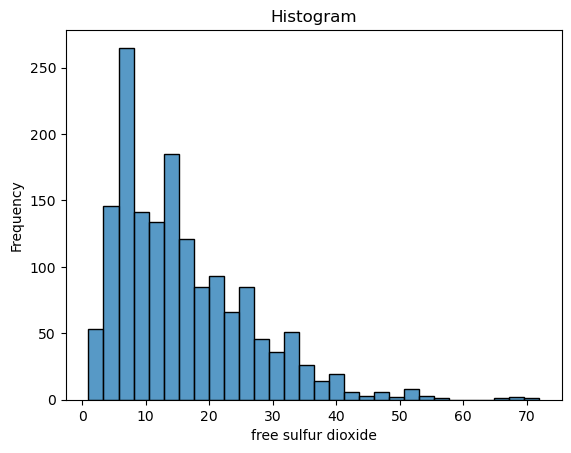

In [29]:


# Set the figure size (adjust as needed)
plt.figure(figsize=(12, 8))


# Loop through each column (feature) in the DataFrame and plot its histogram
for column in ls1:
    sns.histplot(data_wine[column], kde=False, label=column)
    # Add labels and title
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()


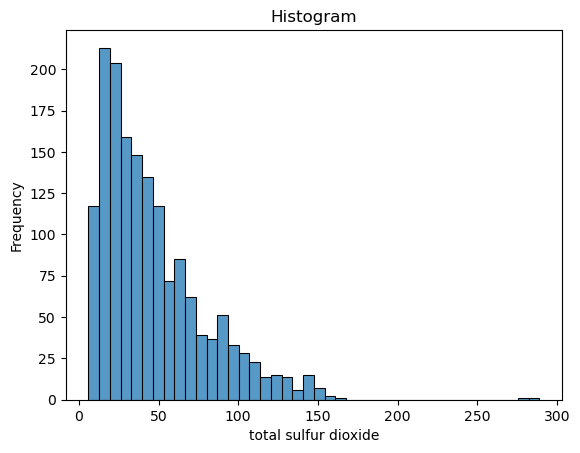

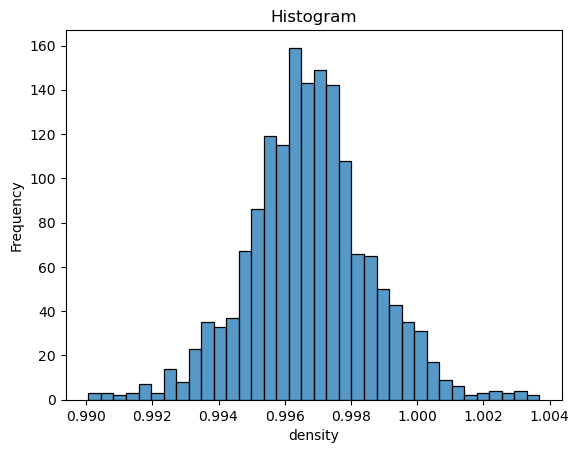

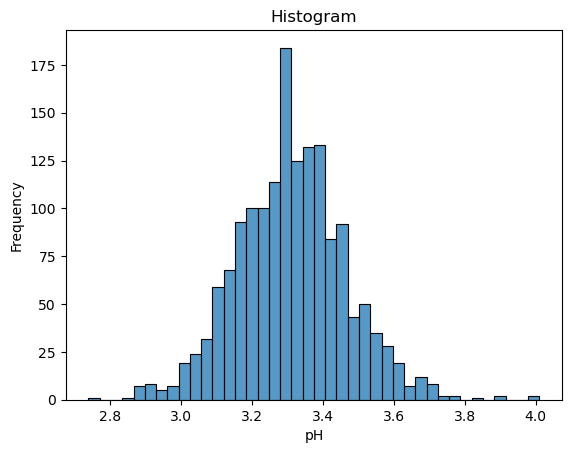

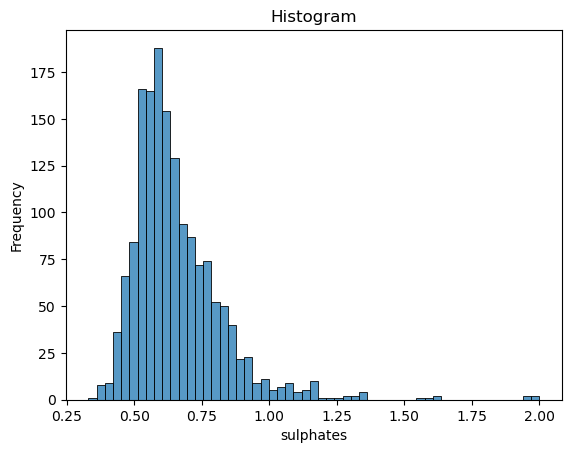

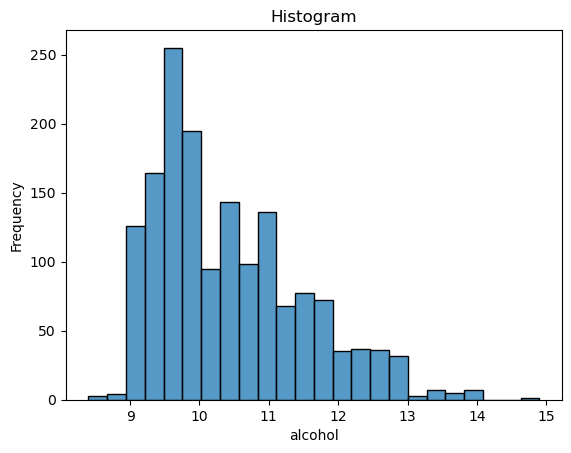

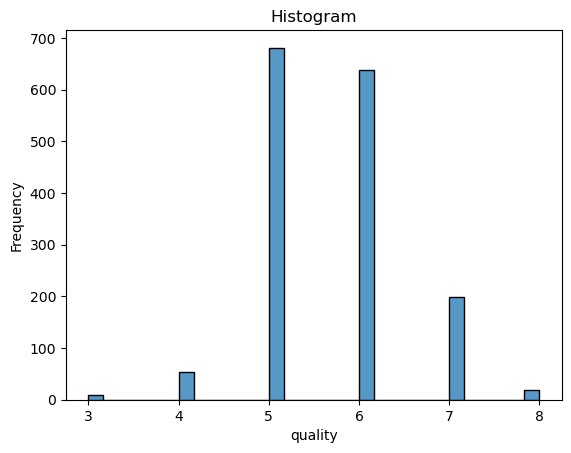

In [30]:
for column in ls2:
    sns.histplot(data_wine[column], kde=False, label=column)
    # Add labels and title
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()

Volatile acidity, Citric acid, Residual sugar, Chlorides, Free sulphur dioxide Exhibit non normality. They can be standardized using standard scalar

***
Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

standard_scalar = StandardScaler()

scaled_data = standard_scalar.fit_transform(data_wine)
data_scaled = pd.DataFrame(preprocessing.scale(data_wine),columns = data_wine.columns) 


In [52]:
scaled_data

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

In [46]:
from sklearn.decomposition import PCA

# Create a PCA object with the desired number of components (n_components)
pca = PCA(n_components=12)  # 'k' is the number of principal components you want to keep

# Fit the PCA model on the scaled data
pca.fit(scaled_data)

PCA(n_components=12)

In [47]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.26009731, 0.1868235 , 0.14024331, 0.10125174, 0.0811053 ,
       0.05521602, 0.05152648, 0.04215605, 0.03427563, 0.02732662,
       0.01501822, 0.00495983])

In [48]:
transformed_data = pca.transform(scaled_data)


In [54]:
import numpy as np
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

In [55]:
cumulative_explained_variance

array([0.26009731, 0.44692081, 0.58716412, 0.68841586, 0.76952116,
       0.82473718, 0.87626366, 0.91841971, 0.95269534, 0.98002195,
       0.99504017, 1.        ])

In [56]:
## Based on cumulative variance ratio, we can conclude that there are 8 features minimum required to keep 90% of that variation of data/